In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn import *


#Load the Data and assign a variable names to them
CBRate = pd.read_excel('/content/Population-data.xlsx','Crude Birth Rate')
CDRate = pd.read_excel('/content/Population-data.xlsx','Crude Death Rate')
NPCRate = pd.read_excel('/content/Population-data.xlsx','Natural Population Change Rate')
POP = pd.read_excel('/content/Population-data.xlsx','Population')
PGRate = pd.read_excel('/content/Population-data.xlsx','Population Growth Rate')
GFRate = pd.read_excel('/content/Population-data.xlsx','General Fertility Rate')
SMRate = pd.read_excel('/content/Population-data.xlsx','Standard Mortality Rate')

#View the first 5 rows to view and have an understanding and view of the Data
POP.head()

,Boroughs,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Barking and Dagenham,161000,161000,160800,160500,159600,158800,157400,155900,153800,...,182800,185911,190600,194400,198300,201979,NaN,NaN,NaN,NaN
1,Barnet,308000,307000,308200,307700,305100,303000,300900,298900,296900,...,351400,356386,364000,369100,374900,379691,NaN,NaN,NaN,NaN
2,Bexley,216000,217000,219500,219600,219200,218600,218100,217100,216500,...,230700,231997,234300,236700,239900,242142,NaN,NaN,NaN,NaN
3,Brent,281000,281000,281000,278100,273500,268100,263300,260600,259900,...,304800,311215,314700,317300,320800,324012,NaN,NaN,NaN,NaN
4,Bromley,305000,305000,308800,306700,303500,302200,300500,299000,298700,...,308600,309392,314000,317900,321300,324857,NaN,NaN,NaN,NaN


In [ ]:
#STEP 1 - Data Understanding

#Perform the info() function to show characteristics of each attributes
info_cbr = CBRate.info()

#Display the result
print(info_cbr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      float64
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      float64
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
dtypes: float64(19)
memory usage: 280.0 bytes
None


In [ ]:
info_cdr = CDRate.info()

#Display the result
print(info_cdr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      float64
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      float64
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
dtypes: float64(19)
memory usage: 280.0 bytes
None


In [ ]:
info_npc = NPCRate.info()

#Display the result
print(info_npc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      float64
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      float64
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
dtypes: float64(19)
memory usage: 280.0 bytes
None


In [ ]:
info_pop = POP.info()

#Display the result
print(info_pop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Boroughs  33 non-null     object 
 1   1970      33 non-null     int64  
 2   1971      33 non-null     int64  
 3   1972      33 non-null     int64  
 4   1973      33 non-null     int64  
 5   1974      33 non-null     int64  
 6   1975      33 non-null     int64  
 7   1976      33 non-null     int64  
 8   1977      33 non-null     int64  
 9   1978      33 non-null     int64  
 10  1979      33 non-null     int64  
 11  1980      33 non-null     int64  
 12  1981      33 non-null     int64  
 13  1982      33 non-null     int64  
 14  1983      33 non-null     int64  
 15  1984      33 non-null     int64  
 16  1985      33 non-null     int64  
 17  1986      33 non-null     int64  
 18  1987      33 non-null     int64  
 19  1988      33 non-null     int64  
 20  1989      33 non-null     int64  


In [ ]:
info_pgr = PGRate.info()

#Display the result
print(info_pgr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      int64  
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      float64
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
dtypes: float64(18), int64(1)
memory usage: 280.0 bytes
None


In [ ]:
info_gfr = GFRate.info()

#Display the result
print(info_gfr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      float64
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      int64  
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
dtypes: float64(18), int64(1)
memory usage: 280.0 bytes
None


In [ ]:
info_smr = SMRate.info()

#Display the result
print(info_smr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      int64  
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      int64  
 15  2016    1 non-null      int64  
 16  2017    1 non-null      int64  
 17  2018    1 non-null      int64  
 18  2019    1 non-null      int64  
dtypes: float64(13), int64(6)
memory usage: 280.0 bytes
None


In [ ]:
#STEP 2 - Data Preparation

#Required calculations done in excel prior to loading the dataset in Python

# count null values in each column of all variables
null_counts_POP = POP.isnull().sum()
null_counts_CBR = CBRate.isnull().sum()
null_counts_NPC = NPCRate.isnull().sum()
null_counts_CDR = CDRate.isnull().sum()
null_counts_PGR = PGRate.isnull().sum()
null_counts_GFR = GFRate.isnull().sum()
null_counts_SMR = SMRate.isnull().sum()

# concatenate null_counts_POP and null_counts_CBR DataFrames along columns
null_counts = pd.concat([null_counts_POP, null_counts_CBR,null_counts_NPC, null_counts_CDR, null_counts_PGR,null_counts_GFR,null_counts_SMR], axis=1)

# set column names
null_counts.columns = ['CBR','CDR', 'NPC', 'POP', 'PGR','GFR','SMR']

print(null_counts)

          CBR  CDR  NPC  POP  PGR  GFR  SMR
Boroughs    0  NaN  NaN  NaN  NaN  NaN  NaN
1970        0  NaN  NaN  NaN  NaN  NaN  NaN
1971        0  NaN  NaN  NaN  NaN  NaN  NaN
1972        0  NaN  NaN  NaN  NaN  NaN  NaN
1973        0  NaN  NaN  NaN  NaN  NaN  NaN
1974        0  NaN  NaN  NaN  NaN  NaN  NaN
1975        0  NaN  NaN  NaN  NaN  NaN  NaN
1976        0  NaN  NaN  NaN  NaN  NaN  NaN
1977        0  NaN  NaN  NaN  NaN  NaN  NaN
1978        0  NaN  NaN  NaN  NaN  NaN  NaN
1979        0  NaN  NaN  NaN  NaN  NaN  NaN
1980        0  NaN  NaN  NaN  NaN  NaN  NaN
1981        0  NaN  NaN  NaN  NaN  NaN  NaN
1982        0  NaN  NaN  NaN  NaN  NaN  NaN
1983        0  NaN  NaN  NaN  NaN  NaN  NaN
1984        0  NaN  NaN  NaN  NaN  NaN  NaN
1985        0  NaN  NaN  NaN  NaN  NaN  NaN
1986        0  NaN  NaN  NaN  NaN  NaN  NaN
1987        0  NaN  NaN  NaN  NaN  NaN  NaN
1988        0  NaN  NaN  NaN  NaN  NaN  NaN
1989        0  NaN  NaN  NaN  NaN  NaN  NaN
1990        0  NaN  NaN  NaN  Na

In [ ]:
#Drop the 'Boroughs'coulumn and year 1970 to 2000 columns in the variable
pop = POP.iloc[:, 32:]

#Add the variables of all Boroughs to get the total for London

Population = pop.sum()
CBRate = CBRate.sum()
CDRate = CDRate.sum()
GFRate = GFRate.sum()
SMRate = SMRate.sum()
PGRate = PGRate.sum()
NPCRate = NPCRate.sum()

print(Population)

2001    7172057.0
2002    7376900.0
2003    7394700.0
2004    7432900.0
2005    7519000.0
2006    7597800.0
2007    7693600.0
2008    7812400.0
2009    7942500.0
2010    8061300.0
2011    8173941.0
2012    8308600.0
2013    8416700.0
2014    8538700.0
2015    8673713.0
2016          0.0
2017          0.0
2018          0.0
2019          0.0
dtype: float64


In [ ]:
#Fill the null cells/zeros in population using the average Population Growth Rate for the previous years to derive the population for the years with missing data, for the sake of the analysis

# Update the values for 2016, 2017, 2018, and 2019
Population.loc[2016] = 8784323
Population.loc[2017] = 8896344
Population.loc[2018] = 9009794
Population.loc[2019] = 9124690


# Print the updated DataFrame
print(Population)

2001    7172057.0
2002    7376900.0
2003    7394700.0
2004    7432900.0
2005    7519000.0
2006    7597800.0
2007    7693600.0
2008    7812400.0
2009    7942500.0
2010    8061300.0
2011    8173941.0
2012    8308600.0
2013    8416700.0
2014    8538700.0
2015    8673713.0
2016    8784323.0
2017    8896344.0
2018    9009794.0
2019    9124690.0
dtype: float64


In [ ]:
#Create a new dataframe with the sum of all numbers/rates of all the Boroughs to get the rates for London, UK.

London_data = pd.DataFrame({
    'CBRate' : CBRate,
    'CDRate' : CDRate,
    'NPCRate' : NPCRate,
    'Population' : Population,
    'PGRate' : PGRate,
    'GFRate' : GFRate,
    'SMRate' : SMRate,
})

print (London_data)

         CBRate    CDRate    NPCRate  Population    PGRate     GFRate  \
2001  14.523309  8.168228   6.355081   7172057.0  0.000000  60.600000   
2002  14.323534  7.823312   6.500222   7376900.0  0.028529  58.647869   
2003  14.942763  7.844548   7.098215   7394700.0  0.002460  60.603850   
2004  15.302184  7.279559   8.022624   7432900.0  0.005127  61.562652   
2005  15.438604  7.052791   8.385813   7519000.0  0.011608  61.953888   
2006  15.922057  6.743377   9.178679   7597800.0  0.010482  64.101844   
2007  16.319418  6.540219   9.779199   7693600.0  0.012589  65.837965   
2008  16.346437  6.465945   9.880493   7812400.0  0.015427  66.369212   
2009  16.272392  6.112738  10.159653   7942500.0  0.016696  66.521694   
2010  16.511950  5.991072  10.520877   8061300.0  0.014970  68.153704   
2011  16.700264  5.868972  10.831292   8173941.0 -0.013267  67.828951   
2012  16.126115  5.756254  10.369861   8308600.0  0.044044  66.568771   
2013  15.225398  5.644924   9.580473   8416700.0  0

In [ ]:
#For the sake of Data explorations & visualization, convert the index column 'Years' to a regular column in the dataframe
London_data = London_data.reset_index().rename(columns={'index': 'Years'})

print(London_data)

    Years     CBRate    CDRate    NPCRate  Population    PGRate     GFRate  \
0    2001  14.523309  8.168228   6.355081   7172057.0  0.000000  60.600000   
1    2002  14.323534  7.823312   6.500222   7376900.0  0.028529  58.647869   
2    2003  14.942763  7.844548   7.098215   7394700.0  0.002460  60.603850   
3    2004  15.302184  7.279559   8.022624   7432900.0  0.005127  61.562652   
4    2005  15.438604  7.052791   8.385813   7519000.0  0.011608  61.953888   
5    2006  15.922057  6.743377   9.178679   7597800.0  0.010482  64.101844   
6    2007  16.319418  6.540219   9.779199   7693600.0  0.012589  65.837965   
7    2008  16.346437  6.465945   9.880493   7812400.0  0.015427  66.369212   
8    2009  16.272392  6.112738  10.159653   7942500.0  0.016696  66.521694   
9    2010  16.511950  5.991072  10.520877   8061300.0  0.014970  68.153704   
10   2011  16.700264  5.868972  10.831292   8173941.0 -0.013267  67.828951   
11   2012  16.126115  5.756254  10.369861   8308600.0  0.044044 

In [ ]:
#STEP 3 - DATA ANALYSIS

# Combine results into a single DataFrame
statistics = pd.DataFrame({
    'Sum': London_data.sum(),
    'Mean': London_data.mean(),
    'Standard deviation': London_data.std(),
    'Skewness': London_data.skew(),
    'Kurtosis': London_data.kurt(),
})

# Print the result
print(statistics)

                     Sum          Mean  Standard deviation  Skewness  Kurtosis
Years       3.819000e+04  2.010000e+03            5.627314  0.000000 -1.200000
CBRate      2.889794e+02  1.520944e+01            1.062244 -0.491373 -0.320239
CDRate      1.211028e+02  6.373831e+00            0.872902  0.897812 -0.494103
NPCRate     1.687925e+02  8.883818e+00            1.331446 -0.516155 -0.652810
Population  1.539300e+08  8.101577e+06       616503.602035  0.183928 -1.298370
PGRate      2.412559e-01  1.269768e-02            0.011234  0.604652  3.851455
GFRate      1.205243e+03  6.343383e+01            2.913831 -0.013181 -1.009563
SMRate      1.772739e+03  9.330203e+01            3.565468 -0.405218 -0.742177


In [ ]:
#Calculate the correlation of each variable with the Population size of London in descending order
variable_correlation = London_data.corr()['NPCRate'].sort_values(ascending = False)

#Display the correlation values
print(variable_correlation)

NPCRate       1.000000
GFRate        0.937121
CBRate        0.728193
Years         0.354062
Population    0.283881
PGRate        0.104407
SMRate       -0.175772
CDRate       -0.651010
Name: NPCRate, dtype: float64


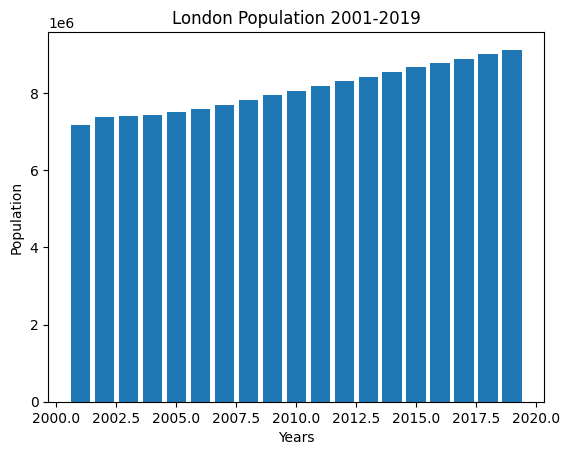

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(London_data['Years'], London_data['Population'])

# Add title and axis labels
plt.title('London Population 2001-2019')
plt.xlabel('Years')
plt.ylabel('Population')

# Display the chart
plt.show()

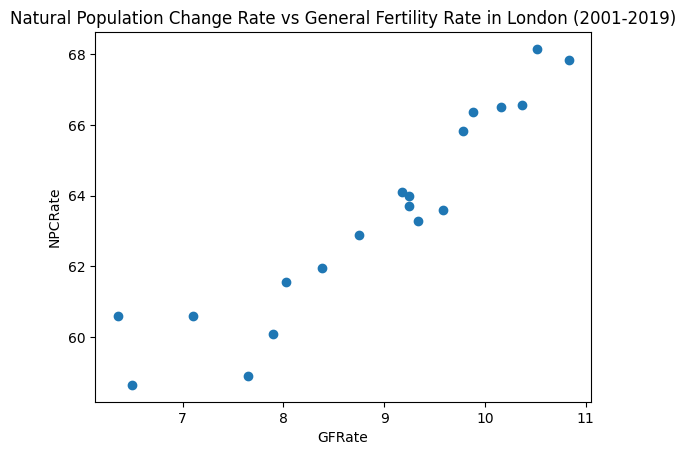

In [ ]:
#PLotting a scatter plot of Population and General Fertility Rate
plt.scatter(London_data['NPCRate'], London_data['GFRate'])
plt.xlabel('GFRate')
plt.ylabel('NPCRate')
plt.title('Natural Population Change Rate vs General Fertility Rate in London (2001-2019)')
plt.show()

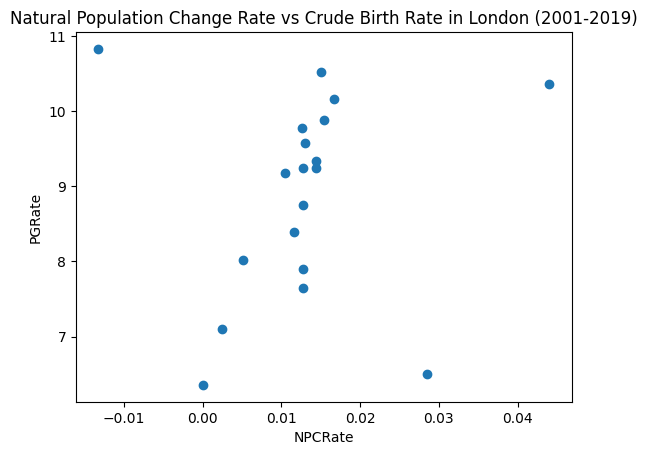

In [ ]:
#PLotting a scatter plot of Population and General Fertility Rate
plt.scatter(London_data['PGRate'], London_data['NPCRate'])
plt.xlabel('NPCRate')
plt.ylabel('PGRate')
plt.title('Natural Population Change Rate vs Crude Birth Rate in London (2001-2019)')
plt.show()

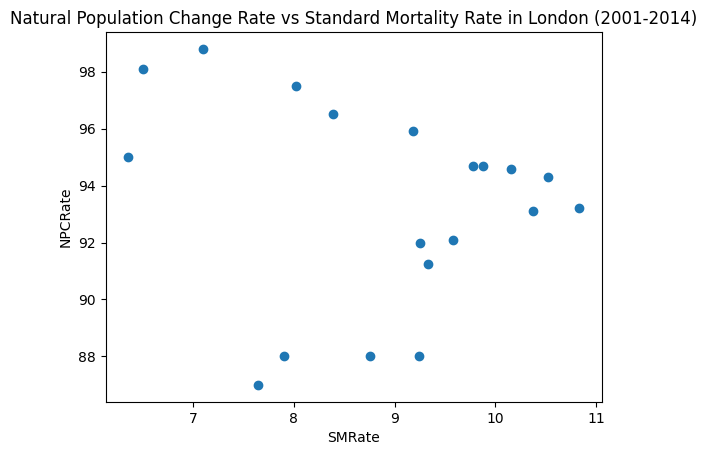

In [ ]:
#PLotting a scatter plot of Population and General Fertility Rate
plt.scatter(London_data['NPCRate'], London_data['SMRate'])
plt.xlabel('SMRate')
plt.ylabel('NPCRate')
plt.title('Natural Population Change Rate vs Standard Mortality Rate in London (2001-2014)')
plt.show()

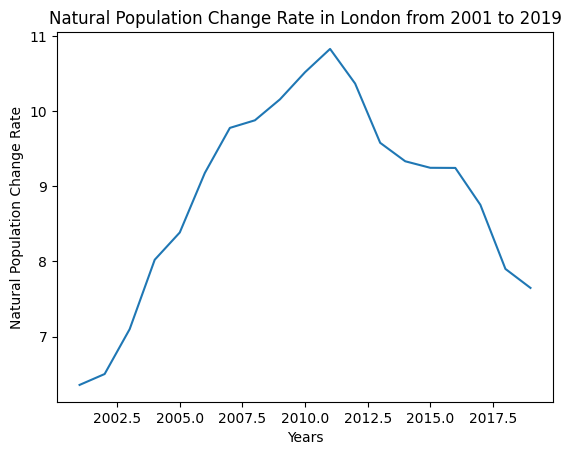

In [ ]:
import matplotlib.pyplot as plt

# Plot the line graph
plt.plot(London_data['Years'], London_data['NPCRate'])
plt.xlabel('Years')
plt.ylabel('Natural Population Change Rate')
plt.title('Natural Population Change Rate in London from 2001 to 2019')
plt.show()

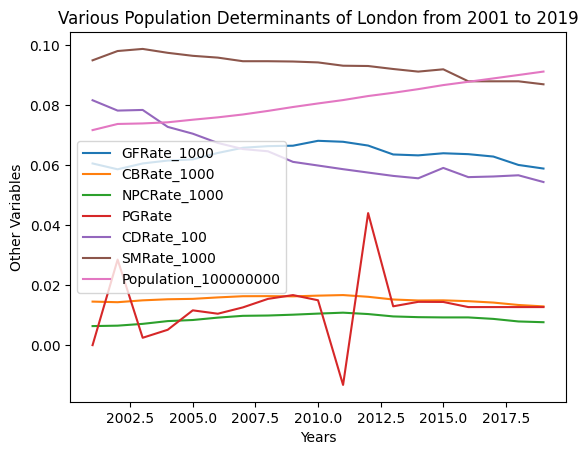

In [ ]:
# Create a new column for population divided by 10,000
London_data['Population_100000000'] = London_data['Population'] / 100000000
London_data['GFRate_1000'] = London_data['GFRate'] / 1000
London_data['CBRate_1000'] = London_data['CBRate'] / 1000
London_data['NPCRate_1000'] = London_data['NPCRate'] / 1000
London_data['CDRate_100'] = London_data['CDRate'] / 100
London_data['SMRate_1000'] = London_data['SMRate'] / 1000

# Plot the line graph
London_data.plot(x='Years', y=['GFRate_1000', 'CBRate_1000', 'NPCRate_1000', 'PGRate', 'CDRate_100', 'SMRate_1000', 'Population_100000000'])

# Set the labels and title
plt.xlabel('Years')
plt.ylabel('Other Variables')
plt.title('Various Population Determinants of London from 2001 to 2019')

# Show the plot
plt.show()

Explained Variance Ratio for CBRate: 0.4517
Explained Variance Ratio for CDRate: 0.3928
Explained Variance Ratio for NPCRate: 0.1396
Explained Variance Ratio for Population: 0.0117
Explained Variance Ratio for PGRate: 0.0035
Explained Variance Ratio for GFRate: 0.0006
Explained Variance Ratio for SMRate: 0.0000

Optimal Number of Components: 4

Top Principal Components:
    PC1: CBRate  PC2: CDRate  PC3: NPCRate  PC4: Population
0      3.393309     0.853681     -0.869772         0.830549
1      3.254456     1.154142      1.843365        -0.132996
2      3.200909     0.143568     -0.535549        -0.285696
3      2.198637    -0.317194     -0.398890        -0.324877
4      1.623456    -0.400255      0.120596        -0.221497
5      0.796008    -1.182650     -0.075093        -0.095229
6      0.022129    -1.715560      0.010098         0.195404
7     -0.240738    -1.783119      0.244474         0.206250
8     -0.702185    -1.743167      0.330629        -0.022202
9     -1.192193    -2.18535

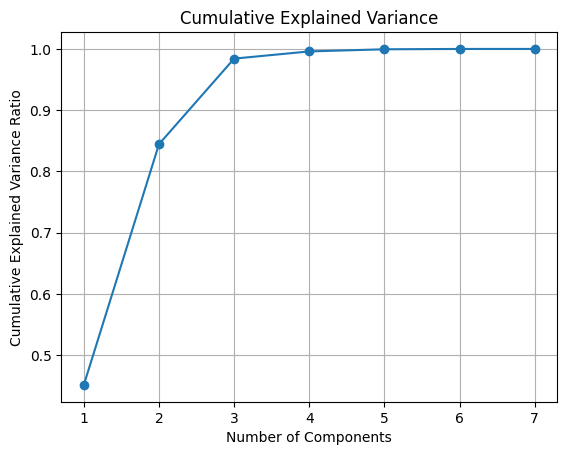

Total Variance Explained: 0.9959


In [ ]:
#STEP 5 - DATA MINING

#UNSUPERVISED LEARNING METHOD

#Import needed librariesimport pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the variable variables
variables = London_data[['CBRate', 'CDRate', 'NPCRate', 'Population', 'PGRate', 'GFRate', 'SMRate']]

# Standardize the variable variables
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_variables)

# Assess the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for {variables.columns[i]}: {ratio:.4f}")

# Determine the optimal number of components
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 2
print(f"\nOptimal Number of Components: {n_components}")

# Get the top 'n_components' principal components with column names
top_components = pd.DataFrame(data=principal_components[:, :n_components], columns=[f"PC{i+1}: {variables.columns[i]}" for i in range(n_components)])

# Display the top components
print("\nTop Principal Components:")
print(top_components)

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio against components
plt.figure()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#Assess the Model using the Total variance explained
total_variance_explained = np.sum(explained_variance_ratio[:n_components])
print(f"Total Variance Explained: {total_variance_explained:.4f}")


Year: [2020]
Predicted Population: 9192580.47
Predicted CBRate: 14.50
Predicted CDRate: 4.93
Predicted NPCRate: 0.001040

Year: [2021]
Predicted Population: 9301680.83
Predicted CBRate: 14.42
Predicted CDRate: 4.79
Predicted NPCRate: 0.001036

Year: [2022]
Predicted Population: 9410781.18
Predicted CBRate: 14.35
Predicted CDRate: 4.64
Predicted NPCRate: 0.001032

Year: [2023]
Predicted Population: 9519881.53
Predicted CBRate: 14.28
Predicted CDRate: 4.50
Predicted NPCRate: 0.001027

Year: [2024]
Predicted Population: 9628981.88
Predicted CBRate: 14.21
Predicted CDRate: 4.36
Predicted NPCRate: 0.001023

Year: [2025]
Predicted Population: 9738082.24
Predicted CBRate: 14.14
Predicted CDRate: 4.21
Predicted NPCRate: 0.001019

Year: [2026]
Predicted Population: 9847182.59
Predicted CBRate: 14.07
Predicted CDRate: 4.07
Predicted NPCRate: 0.001015

Year: [2027]
Predicted Population: 9956282.94
Predicted CBRate: 14.00
Predicted CDRate: 3.92
Predicted NPCRate: 0.001012

Year: [2028]
Predicted P

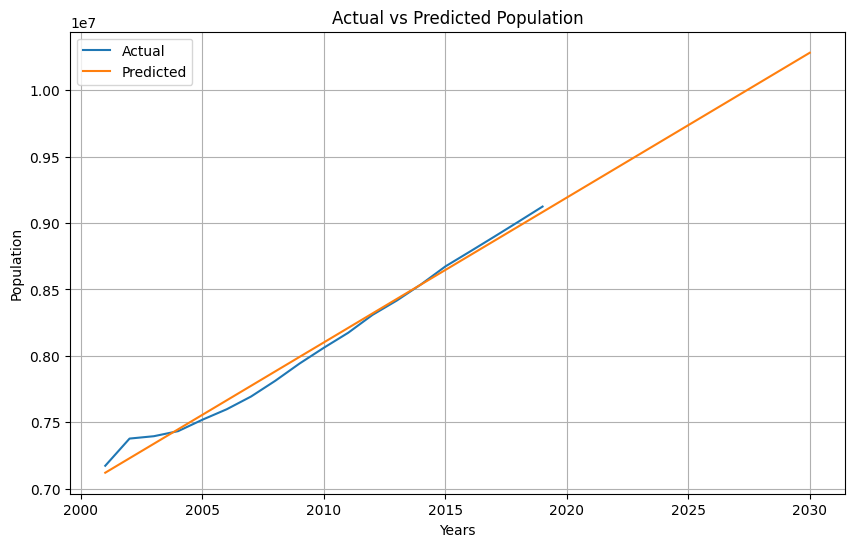

In [ ]:
#STEP 5 - DATA MINING & PREDICTIONS

#SUPERVISED LEARNING METHOD - LINEAR REGRESSION

#Import the required libraries
import numpy as np
from sklearn.linear_model import LinearRegression

#Assign variables
X = London_data['Years'].values.reshape(-1, 1)  # Reshape to a 2D array
y_population = London_data['Population']
y_cbrate = London_data['CBRate']
y_cdrate = London_data['CDRate']
y_npc_rate = London_data['NPCRate']

#Create linear regression models for Population, CBRate, and CDRate
model_population = LinearRegression()
model_cbrate = LinearRegression()
model_cdrate = LinearRegression()

#Fit the models to the respective data
model_population.fit(X, y_population)
model_cbrate.fit(X, y_cbrate)
model_cdrate.fit(X, y_cdrate)

#Predict Population, CBRate, and CDRate for the years 2020-2030
future_years = np.arange(2020, 2031).reshape(-1, 1)
predicted_population = model_population.predict(future_years)
predicted_cbrate = model_cbrate.predict(future_years)
predicted_cdrate = model_cdrate.predict(future_years)

#Predict NPCRate using the predicted values of CBRate, CDRate, and Population
predicted_npc_rate = ((predicted_cbrate - predicted_cdrate) / predicted_population)*1000

#Display the predicted values
for i in range(len(future_years)):
    print(f"Year: {future_years[i]}")
    print(f"Predicted Population: {predicted_population[i]:.2f}")
    print(f"Predicted CBRate: {predicted_cbrate[i]:.2f}")
    print(f"Predicted CDRate: {predicted_cdrate[i]:.2f}")
    print(f"Predicted NPCRate: {predicted_npc_rate[i]:.6f}")
    print('')

#Assess the model's prediction of population
score_population = model_population.score(X, y_population)

#Display score
print(f"Population Model R-squared score: {score_population:.2f}")

#Evaluate the performance of the model from 2001-2030

# Predict Population, CBRate, and CDRate for the years 20-2030
future_years = np.arange(2001, 2031).reshape(-1, 1)
predicted_population = model_population.predict(future_years)

# Plot the actual and predicted values for Population
plt.figure(figsize=(10, 6))
plt.plot(X, y_population, label='Actual')
plt.plot(future_years, predicted_population, label='Predicted')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)
plt.show()

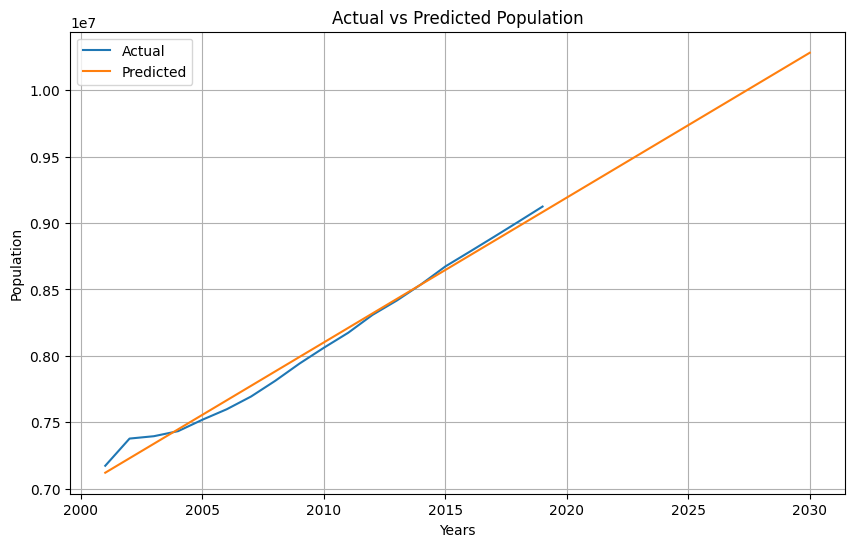